In [412]:
import numpy as np

data = np.genfromtxt("D:\\Homework\\CPSC 483\\female200.csv", delimiter = ',')
x = data[:,0][:,None]
t = data[:,1][:,None]

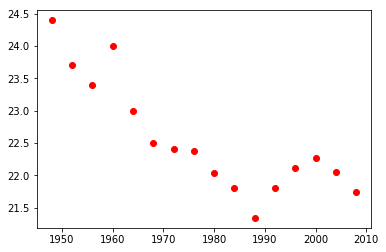

In [413]:
import pylab as plt
%matplotlib inline
plt.plot(x, t, 'ro')

The relationship does not seem to appear linear.

In [414]:
xbar = x.mean()
tbar = t.mean()
xxbar = np.multiply(x, x).mean()
xtbar = np.multiply(x, t).mean()
w1 = (tbar * xbar - xtbar) / (xbar * xbar - xxbar)
w0 = tbar - w1 * xbar

Text(0, 0.5, 'Winning time (s)')

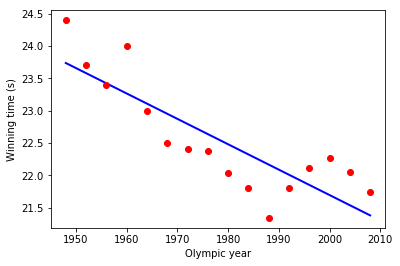

In [415]:
xTest = np.linspace(1948, 2008, 100)[:,None]
fTest = w0 + w1 * xTest
plt.plot(xTest, fTest, 'b-', linewidth = 2)
plt.plot(x, t, 'ro')
plt.xlabel('Olympic year')
plt.ylabel('Winning time (s)')

In [416]:
predVal = []
for i in x:
    predVal.extend(w0 + w1 * i)
    
loss = []
for i, j in zip(predVal, t):
    loss.extend((i - j)**2)

lossAvg = np.average(loss)
print(lossAvg)

0.21367694852941077


In [417]:
maxorder = 3
x = (x - 1948) / 4
X = np.ones_like(x)
for i in range(1, maxorder + 1):
    X = np.hstack((X, x**i))

In [418]:
w = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))
xTest = np.linspace(0, 15, 100)[:,None]
XTest = np.ones_like(xTest)
for i in range(1, maxorder + 1):
    XTest = np.hstack((XTest, xTest**i))
    
fTest = np.dot(XTest, w)

In [419]:
predVal3 = []
predVal3.append(np.dot(X, w))

loss3 = []
for i in predVal3:
    tempLoss = []
    for j, k in zip(i, t):
        tempLoss.extend((j - k)**2)
    loss3.extend(tempLoss)

lossAvg3 = np.average(loss3)
print(lossAvg3)

0.08717867111925753


The loss of the third order polynomial model compared to the linear model is much lower.

In [420]:
maxorder = 5
X5 = np.ones_like(x)
for i in range(1, maxorder + 1):
    X5 = np.hstack((X5, x**i))

In [421]:
w5 = np.dot(np.linalg.inv(np.dot(X5.T,X5)),np.dot(X5.T,t))
xTest5 = np.linspace(0, 15, 100)[:,None]
XTest5 = np.ones_like(xTest5)
for i in range(1, maxorder + 1):
    XTest5 = np.hstack((XTest5, xTest5**i))
    
fTest5 = np.dot(XTest5, w5)

Text(0, 0.5, 'Winning times (s)')

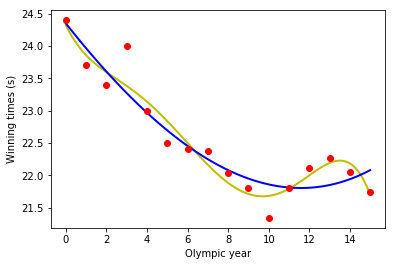

In [422]:
plt.figure()
plt.plot(xTest5, fTest5, 'y-', linewidth = 2)
plt.plot(xTest, fTest, 'b-', linewidth = 2)
plt.plot(x, t, 'ro')
plt.xlabel('Olympic year')
plt.ylabel('Winning times (s)')


In [423]:
predVal5 = []
predVal5.append(np.dot(X5, w5))
    
    
loss5 = []
for i in predVal5:
    tempLoss = []
    for j, k in zip(i, t):
        tempLoss.extend((j - k)**2)
    loss5.extend(tempLoss)

lossAvg5 = np.average(loss5)
print(lossAvg5)

0.05161528042391057


The loss of the 5th order polynomial model is less than that of the third order polynomial model or the linear model.

The 5th order polynomial looks like a better model of the data according to the amount of loss, but the 5th order model could be overfitting.

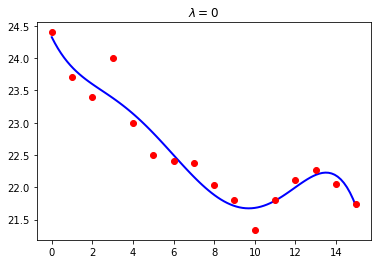

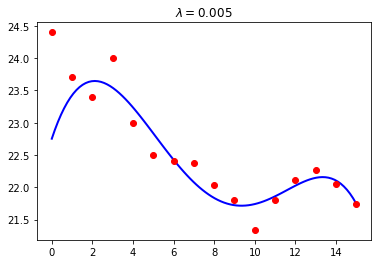

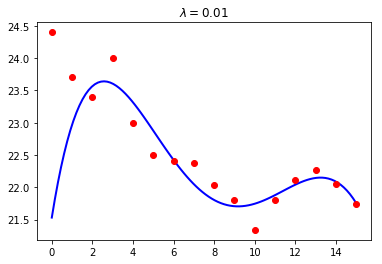

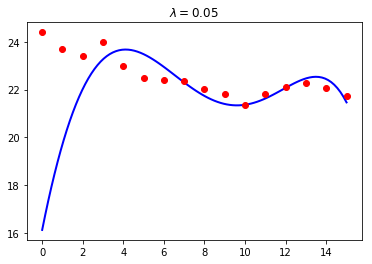

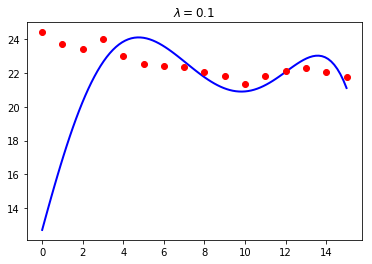

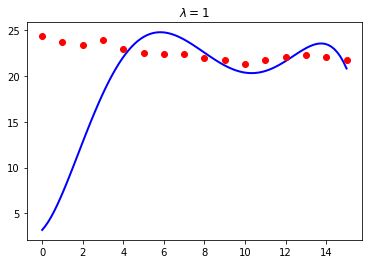

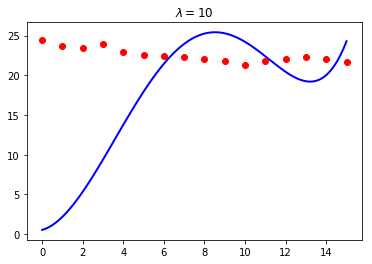

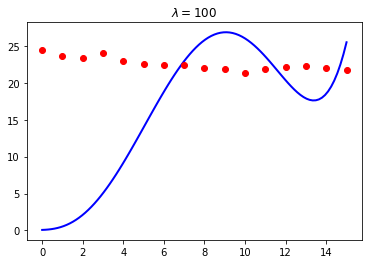

In [424]:
for lamb in [0,0.005,0.01,0.05,0.1,1,10,100]:
    wL = np.linalg.solve(np.dot(X5.T, X5) + x.size*lamb*np.identity(maxorder + 1), np.dot(X5.T, t))
    f_test = np.dot(XTest5, wL)
    plt.figure()
    plt.plot(xTest5, f_test, 'b-', linewidth = 2)
    plt.plot(x, t, 'ro')
    title = '$\lambda = $%g'%lamb
    plt.title(title)

Lambda value of .05 seems to fit the data the best.